## Исследование работы пользователей в АСУ ПА ЦДИМ 

Загрузим для работы необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install xlrd

#!pip install -U nbconvert==5.6.1 --user

In [3]:
df = pd.read_excel('report_cdim.xlsx')
df.fillna('-')
df.rename(columns={'2023 г' : 'users_count_jan',
                  'Unnamed: 3': 'users_count_connect_jan',
                  'Unnamed: 4': 'users_ftime_jan',
                  'Unnamed: 5' : 'users_count_feb',
                  'Unnamed: 6' : 'users_count_connect_feb',
                  'Unnamed: 7' : 'users_ftime_feb',
                  'Unnamed: 8' : 'users_count_mrch',
                  'Unnamed: 9' : 'users_count_connect_mrch',
                  'Unnamed: 10' : 'users_ftime_mrch',
                  'Unnamed: 11' : 'users_count_april',
                  'Unnamed: 12' : 'users_count_connect_april',
                  'Unnamed: 13' : 'users_ftime_april',
                  'Unnamed: 14' : 'users_count_may',
                  'Unnamed: 15' : 'users_count_connect_may',
                  'Unnamed: 16': 'users_ftime_may'}, inplace=True)


In [4]:
#Посмотрим на сами данные
df.info()
#Пропуски есть и есть лишние столбцы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   п/п                        48 non-null     float64
 1   Структурное подразделение  49 non-null     object 
 2   users_count_jan            54 non-null     object 
 3   users_count_connect_jan    50 non-null     object 
 4   users_ftime_jan            53 non-null     object 
 5   users_count_feb            51 non-null     object 
 6   users_count_connect_feb    50 non-null     object 
 7   users_ftime_feb            50 non-null     object 
 8   users_count_mrch           51 non-null     object 
 9   users_count_connect_mrch   50 non-null     object 
 10  users_ftime_mrch           50 non-null     object 
 11  users_count_april          51 non-null     object 
 12  users_count_connect_april  50 non-null     object 
 13  users_ftime_april          50 non-null     object 
 

**Удалим пропуски и переведем в нужный нам формат**

In [5]:
df.drop('п/п',axis = 1,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Структурное подразделение  49 non-null     object
 1   users_count_jan            54 non-null     object
 2   users_count_connect_jan    50 non-null     object
 3   users_ftime_jan            53 non-null     object
 4   users_count_feb            51 non-null     object
 5   users_count_connect_feb    50 non-null     object
 6   users_ftime_feb            50 non-null     object
 7   users_count_mrch           51 non-null     object
 8   users_count_connect_mrch   50 non-null     object
 9   users_ftime_mrch           50 non-null     object
 10  users_count_april          51 non-null     object
 11  users_count_connect_april  50 non-null     object
 12  users_ftime_april          50 non-null     object
 13  users_count_may            51 non-null     object
 14  users_count_

In [7]:
#Проверим кол-во пропусков
df.isna().sum()

Структурное подразделение    6
users_count_jan              1
users_count_connect_jan      5
users_ftime_jan              2
users_count_feb              4
users_count_connect_feb      5
users_ftime_feb              5
users_count_mrch             4
users_count_connect_mrch     5
users_ftime_mrch             5
users_count_april            4
users_count_connect_april    5
users_ftime_april            5
users_count_may              4
users_count_connect_may      5
users_ftime_may              5
dtype: int64

In [8]:
#Проверим кол-во дубликатов
df.duplicated().sum()

0

In [9]:
df
#Пропуски у нас в 0,1,50-54 строку.Эти данные нам не понадобятся их можно удалить

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may
0,NaN,Январь,NaN,NaN,Февраль,NaN,NaN,Март,NaN,NaN,Апрель,NaN,NaN,Май,NaN,NaN
1,NaN,Количество пользователей,Количество подключений,"Общее время, мин.",Количество пользователей,Количество подключений,"Общее время, мин.",Количество пользователей,Количество подключений,"Общее время, мин.",Количество пользователей,Количество подключений,"Общее время, мин.",Количество пользователей,Количество подключений,"Общее время, мин."
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0


In [10]:
df.drop(index=range(1,50,54),axis = 0, inplace = True)

In [11]:
df

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may
0,NaN,Январь,NaN,NaN,Февраль,NaN,NaN,Март,NaN,NaN,Апрель,NaN,NaN,Май,NaN,NaN
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0
10,Иркутская ПЧМ,1,2,41,1,15,1023,1,2,42,1,22,9032,0,0,0


In [12]:
df.drop(index=54,axis = 0,inplace=True)

In [13]:
df.drop(index=range(51,54),axis = 0, inplace = True)

In [14]:
df.drop(index=50,axis = 0,inplace=True)

In [15]:
df

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may
0,NaN,Январь,NaN,NaN,Февраль,NaN,NaN,Март,NaN,NaN,Апрель,NaN,NaN,Май,NaN,NaN
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0
10,Иркутская ПЧМ,1,2,41,1,15,1023,1,2,42,1,22,9032,0,0,0


In [16]:
df.drop(index=0,axis = 0,inplace=True)

In [17]:
df

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0
10,Иркутская ПЧМ,1,2,41,1,15,1023,1,2,42,1,22,9032,0,0,0
11,Красноярская ПЧМ,1,1,21,3,8,372,1,1,20,1,9,336,1,1,21


In [18]:
df

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0
10,Иркутская ПЧМ,1,2,41,1,15,1023,1,2,42,1,22,9032,0,0,0
11,Красноярская ПЧМ,1,1,21,3,8,372,1,1,20,1,9,336,1,1,21


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 49
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Структурное подразделение  48 non-null     object
 1   users_count_jan            48 non-null     object
 2   users_count_connect_jan    48 non-null     object
 3   users_ftime_jan            48 non-null     object
 4   users_count_feb            48 non-null     object
 5   users_count_connect_feb    48 non-null     object
 6   users_ftime_feb            48 non-null     object
 7   users_count_mrch           48 non-null     object
 8   users_count_connect_mrch   48 non-null     object
 9   users_ftime_mrch           48 non-null     object
 10  users_count_april          48 non-null     object
 11  users_count_connect_april  48 non-null     object
 12  users_ftime_april          48 non-null     object
 13  users_count_may            48 non-null     object
 14  users_count_

In [20]:
#Посичтаем общее кол-во подключений
df['tot_connections'] = df['users_count_connect_jan']+df['users_count_connect_feb']+df['users_count_connect_mrch']+df['users_count_connect_april']+df['users_count_connect_may']

In [21]:
df['tot_connections'].sum()

1516

In [22]:
#Проверим наличие пропусков после очистки
df.isna().sum()

Структурное подразделение    0
users_count_jan              0
users_count_connect_jan      0
users_ftime_jan              0
users_count_feb              0
users_count_connect_feb      0
users_ftime_feb              0
users_count_mrch             0
users_count_connect_mrch     0
users_ftime_mrch             0
users_count_april            0
users_count_connect_april    0
users_ftime_april            0
users_count_may              0
users_count_connect_may      0
users_ftime_may              0
tot_connections              0
dtype: int64

In [23]:
#Переведем данные в нужный формат
columns_to_change = df.columns.difference(['Структурное подразделение'])
# Изменение типа данных для выбранных столбцов
df[columns_to_change] = df[columns_to_change].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 49
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Структурное подразделение  48 non-null     object
 1   users_count_jan            48 non-null     int64 
 2   users_count_connect_jan    48 non-null     int64 
 3   users_ftime_jan            48 non-null     int64 
 4   users_count_feb            48 non-null     int64 
 5   users_count_connect_feb    48 non-null     int64 
 6   users_ftime_feb            48 non-null     int64 
 7   users_count_mrch           48 non-null     int64 
 8   users_count_connect_mrch   48 non-null     int64 
 9   users_ftime_mrch           48 non-null     int64 
 10  users_count_april          48 non-null     int64 
 11  users_count_connect_april  48 non-null     int64 
 12  users_ftime_april          48 non-null     int64 
 13  users_count_may            48 non-null     int64 
 14  users_count_

In [24]:
new_df = df[['Структурное подразделение','tot_connections']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 49
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Структурное подразделение  48 non-null     object
 1   tot_connections            48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [25]:
new_df

,Структурное подразделение,tot_connections
2,ЦДИМ,198
3,Восточная ДПМ,87
4,Тындинская ПЧМ,29
5,Хабаровская ПЧМ,34
6,Амурская ПЧМ,34
7,Завитинская ПЧМ,58
8,Читинская ПЧМ,54
9,Базаихская ПЧМ,18
10,Иркутская ПЧМ,41
11,Красноярская ПЧМ,20


In [26]:
#Тут отделим таблицу с 0 значениями она нам дальше пригодится для сравнения
new_df_zerorows = new_df[new_df['tot_connections']==0].sort_values(by='tot_connections',ascending = False)
new_df_zerorows

,Структурное подразделение,tot_connections
16,Топкинская ПЧМ,0
17,Омская ПЧМ,0
19,Смолинская ПЧМ,0
20,Челябинская ПЧМ,0
21,Пермская ПЧМ,0
22,Екатеринбургская ПЧМ,0
25,Сызранская ПЧМ,0
32,Тихорецкая ПЧМ,0
37,Вологодская ПЧМ,0
38,Ярославская ПЧМ,0


In [27]:
#сохраним структурки с подклюениями за 6 месяцев
new_df.sort_values(by='tot_connections',ascending = False)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[new_df['tot_connections']>0].sort_values(by='tot_connections',ascending = False)
new_df

,Структурное подразделение,tot_connections
24,Юго-Западная ДПМ,200
0,ЦДИМ,198
44,Северо-Западная ДПМ,103
32,Северо-Восточная ДПМ,101
12,Уральская ДПМ,100
1,Восточная ДПМ,87
39,Московская ДПМ,68
21,Куйбышевская ДПМ,64
5,Завитинская ПЧМ,58
6,Читинская ПЧМ,54


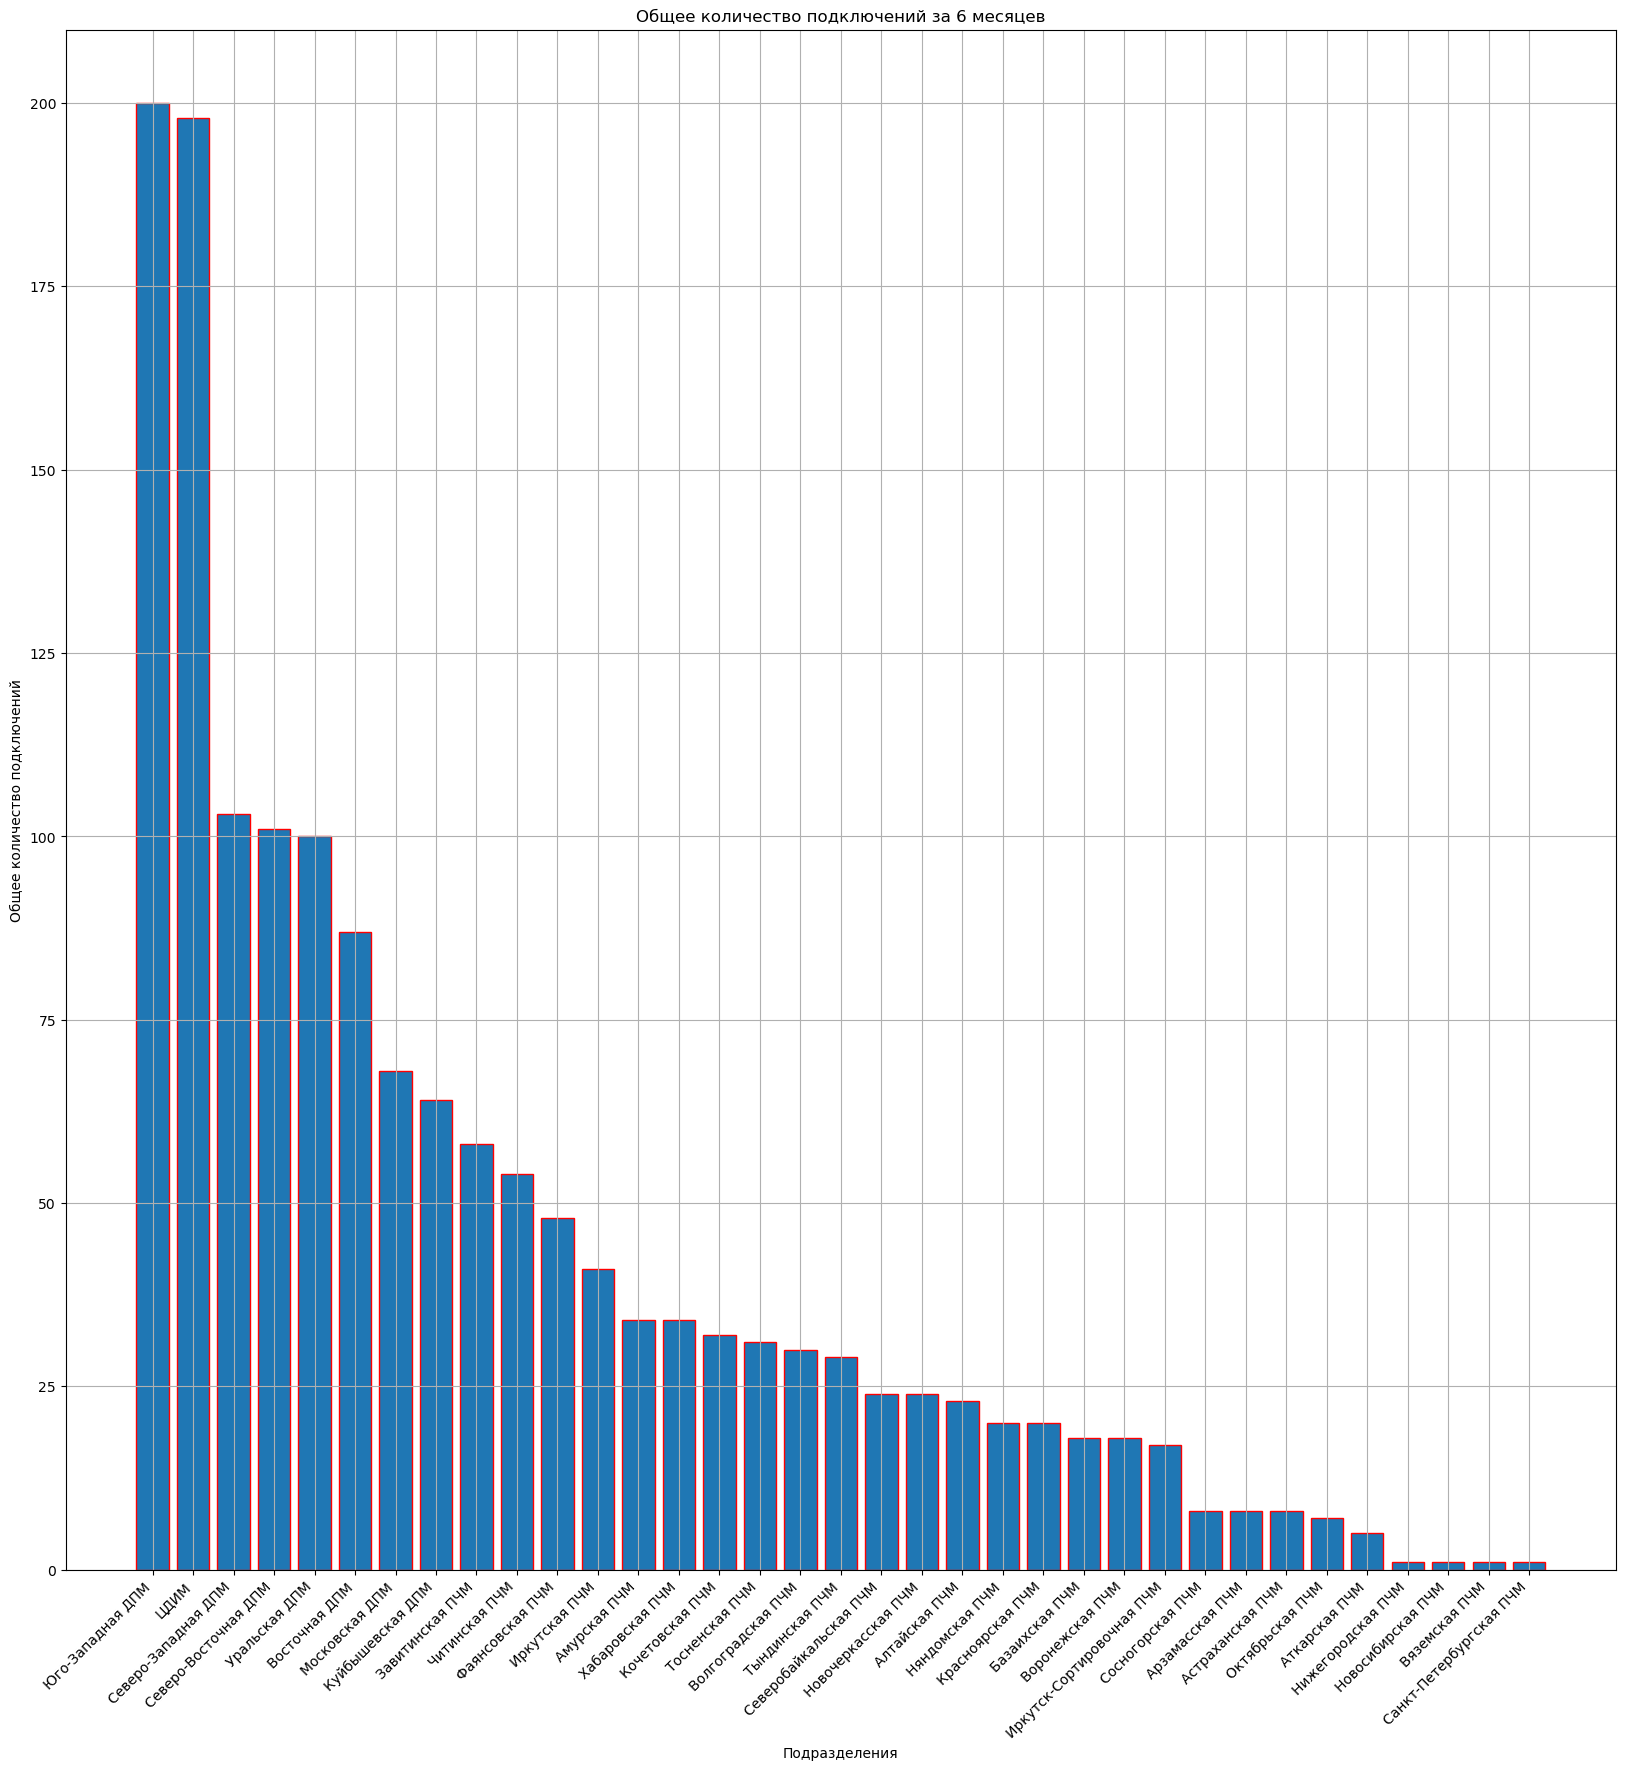

In [28]:
#Построим график со структурками
str_podr = new_df['Структурное подразделение']
plt.figure(figsize=(20, 20))
plt.bar(str_podr,new_df['tot_connections'],edgecolor='red')
plt.xlabel('Подразделения')
plt.ylabel('Общее количество подключений')
plt.title('Общее количество подключений за 6 месяцев')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [29]:
#Посмотрим сколько пользователей структурок работали каждый месяц
work_all_month = df.loc[(df != 0).all(axis=1)]
#Таких всего 6
work_all_month['Структурное подразделение']

2                 ЦДИМ
11    Красноярская ПЧМ
14       Уральская ДПМ
15       Алтайская ПЧМ
23    Куйбышевская ДПМ
26    Юго-Западная ДПМ
Name: Структурное подразделение, dtype: object

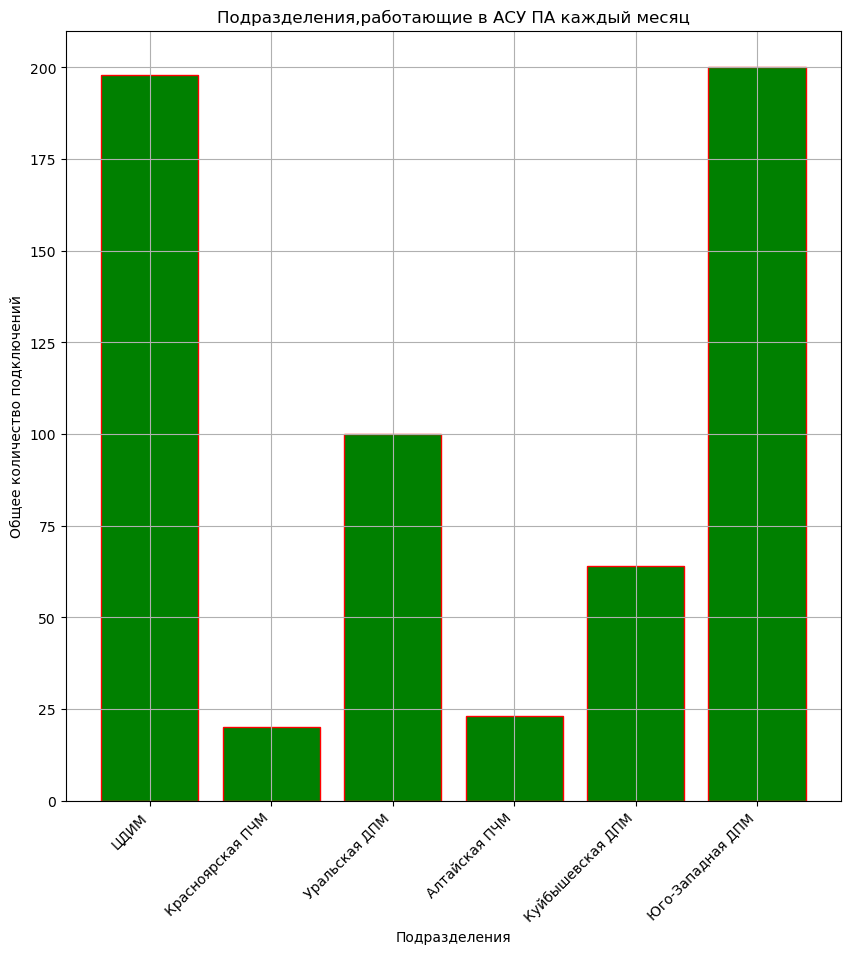

In [30]:
#Для наглядности построим график
plt.figure(figsize=(10, 10))
plt.bar(work_all_month['Структурное подразделение'],work_all_month['tot_connections'],color = 'g', edgecolor='r')
plt.xlabel('Подразделения')
plt.ylabel('Общее количество подключений')
plt.title('Подразделения,работающие в АСУ ПА каждый месяц')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


In [31]:
# Добавим в основную таблицу общим кол-вом пользователей работающих в системе
df['tot_users_work'] = df['users_count_jan']+ df['users_count_feb']+ df['users_count_mrch']+ df['users_count_april']+ df['users_count_may']
df

,Структурное подразделение,users_count_jan,users_count_connect_jan,users_ftime_jan,users_count_feb,users_count_connect_feb,users_ftime_feb,users_count_mrch,users_count_connect_mrch,users_ftime_mrch,users_count_april,users_count_connect_april,users_ftime_april,users_count_may,users_count_connect_may,users_ftime_may,tot_connections,tot_users_work
2,ЦДИМ,2,2,45,3,14,249,4,13,321,2,133,4160,2,36,2223,198,13
3,Восточная ДПМ,0,0,0,3,12,581,0,0,0,3,49,5614,1,26,504,87,7
4,Тындинская ПЧМ,0,0,0,1,9,722,0,0,0,2,20,4933,0,0,0,29,3
5,Хабаровская ПЧМ,1,1,20,2,23,899,1,1,20,2,9,769,0,0,0,34,6
6,Амурская ПЧМ,0,0,0,2,21,1830,1,2,50,2,11,1160,0,0,0,34,5
7,Завитинская ПЧМ,0,0,0,2,31,4722,0,0,0,2,26,1473,1,1,24,58,5
8,Читинская ПЧМ,0,0,0,1,14,1273,0,0,0,1,40,1751,0,0,0,54,2
9,Базаихская ПЧМ,0,0,0,1,9,11835,0,0,0,1,9,3568,0,0,0,18,2
10,Иркутская ПЧМ,1,2,41,1,15,1023,1,2,42,1,22,9032,0,0,0,41,4
11,Красноярская ПЧМ,1,1,21,3,8,372,1,1,20,1,9,336,1,1,21,20,7


In [32]:
# Возьмем из нее данные для построения графика
users_count = df[['Структурное подразделение','tot_users_work']]
users_count.sort_values(by = 'tot_users_work',ascending = False)

,Структурное подразделение,tot_users_work
14,Уральская ДПМ,15
2,ЦДИМ,13
23,Куйбышевская ДПМ,9
26,Юго-Западная ДПМ,9
41,Московская ДПМ,7
11,Красноярская ПЧМ,7
3,Восточная ДПМ,7
46,Северо-Западная ДПМ,6
34,Северо-Восточная ДПМ,6
5,Хабаровская ПЧМ,6


In [33]:
#видим, что тут много нулевых столбцов и выделим их в отдельную таблицу и проверим соответствие с нулевой таблицой
users_count_zero = users_count[users_count['tot_users_work']==0]
users_count_zero

,Структурное подразделение,tot_users_work
16,Топкинская ПЧМ,0
17,Омская ПЧМ,0
19,Смолинская ПЧМ,0
20,Челябинская ПЧМ,0
21,Пермская ПЧМ,0
22,Екатеринбургская ПЧМ,0
25,Сызранская ПЧМ,0
32,Тихорецкая ПЧМ,0
37,Вологодская ПЧМ,0
38,Ярославская ПЧМ,0


In [34]:
#Создадим отдельную таблицу с не нулевым кол-вом пользоваталей
users_count = users_count[users_count['tot_users_work']>0]
users_count.sort_values(by = 'tot_users_work',ascending = False )

,Структурное подразделение,tot_users_work
14,Уральская ДПМ,15
2,ЦДИМ,13
23,Куйбышевская ДПМ,9
26,Юго-Западная ДПМ,9
3,Восточная ДПМ,7
41,Московская ДПМ,7
11,Красноярская ПЧМ,7
46,Северо-Западная ДПМ,6
34,Северо-Восточная ДПМ,6
5,Хабаровская ПЧМ,6


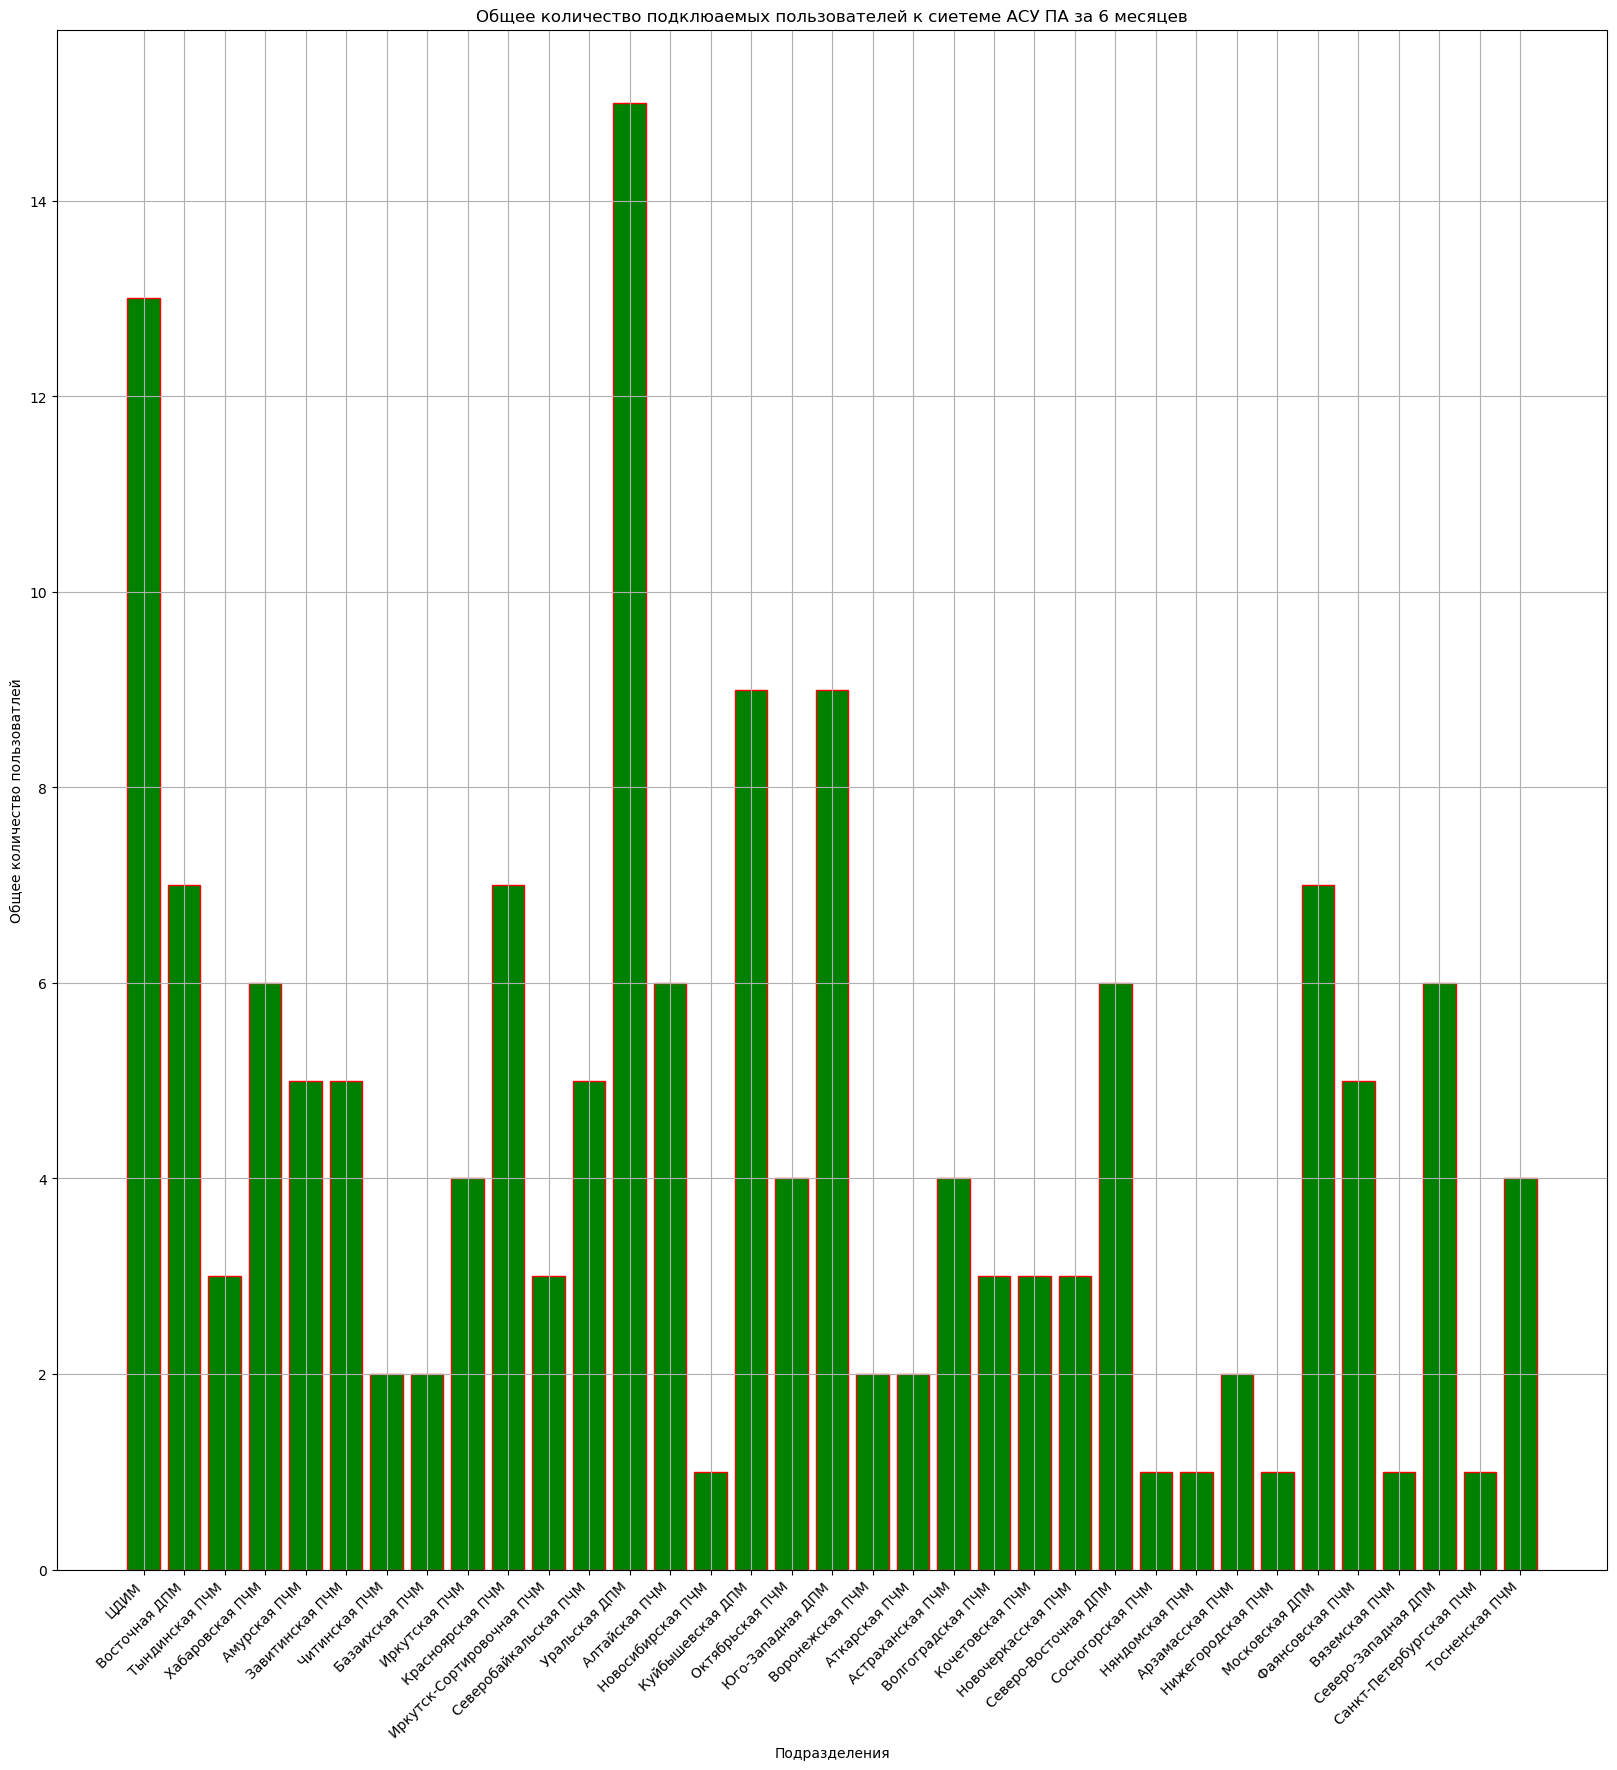

In [35]:
#Построим график
plt.figure(figsize=(20, 20))
plt.bar(users_count['Структурное подразделение'],users_count['tot_users_work'],color = 'g', edgecolor='r')
plt.xlabel('Подразделения')
plt.ylabel('Общее количество пользоватлей')
plt.title('Общее количество подклюаемых пользователей к сиетеме АСУ ПА за 6 месяцев')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [36]:
#Проверим совпадение 
matching_rows_df1 = new_df_zerorows[new_df_zerorows['Структурное подразделение'].isin(users_count_zero['Структурное подразделение'])]
matching_rows_df2 = users_count_zero[users_count_zero['Структурное подразделение'].isin(new_df_zerorows['Структурное подразделение'])]

print("Совпадающие строки в df1:", matching_rows_df1)
print("Совпадающие строки в df2:", matching_rows_df2)
#Строки совпали

Совпадающие строки в df1:    Структурное подразделение  tot_connections
16            Топкинская ПЧМ                0
17                Омская ПЧМ                0
19            Смолинская ПЧМ                0
20           Челябинская ПЧМ                0
21              Пермская ПЧМ                0
22      Екатеринбургская ПЧМ                0
25            Сызранская ПЧМ                0
32            Тихорецкая ПЧМ                0
37           Вологодская ПЧМ                0
38           Ярославская ПЧМ                0
42             Рязанская ПЧМ                0
44              Брянская ПЧМ                0
48           Нигозерская ПЧМ                0
Совпадающие строки в df2:    Структурное подразделение  tot_users_work
16            Топкинская ПЧМ               0
17                Омская ПЧМ               0
19            Смолинская ПЧМ               0
20           Челябинская ПЧМ               0
21              Пермская ПЧМ               0
22      Екатеринбургская ПЧМ      

In [37]:
users_count = users_count[users_count['tot_users_work']>0]
users_count.sort_values(by= 'tot_users_work',ascending = False)

,Структурное подразделение,tot_users_work
14,Уральская ДПМ,15
2,ЦДИМ,13
23,Куйбышевская ДПМ,9
26,Юго-Западная ДПМ,9
3,Восточная ДПМ,7
41,Московская ДПМ,7
11,Красноярская ПЧМ,7
46,Северо-Западная ДПМ,6
34,Северо-Восточная ДПМ,6
5,Хабаровская ПЧМ,6


In [38]:
#посчитаем сумму активных пользователей
users_count['tot_users_work'].sum()

158

In [39]:
#посчитаем общее кол-во времени работы в системе
df['tot_time_works'] = df['users_ftime_jan']+ df['users_ftime_feb']+ df['users_ftime_mrch']+ df['users_ftime_april']+ df['users_ftime_may']

In [40]:
#Создадим таблицу Общее время работы
tot_time_work = df[['Структурное подразделение','tot_time_works']]
tot_time_work = tot_time_work[tot_time_work['tot_time_works']>0]
tot_time_work.sort_values(by = 'tot_time_works',ascending = False).head(10)

,Структурное подразделение,tot_time_works
46,Северо-Западная ДПМ,35304
26,Юго-Западная ДПМ,23887
9,Базаихская ПЧМ,15403
34,Северо-Восточная ДПМ,13621
10,Иркутская ПЧМ,10138
30,Волгоградская ПЧМ,8735
2,ЦДИМ,6998
14,Уральская ДПМ,6976
3,Восточная ДПМ,6699
7,Завитинская ПЧМ,6219


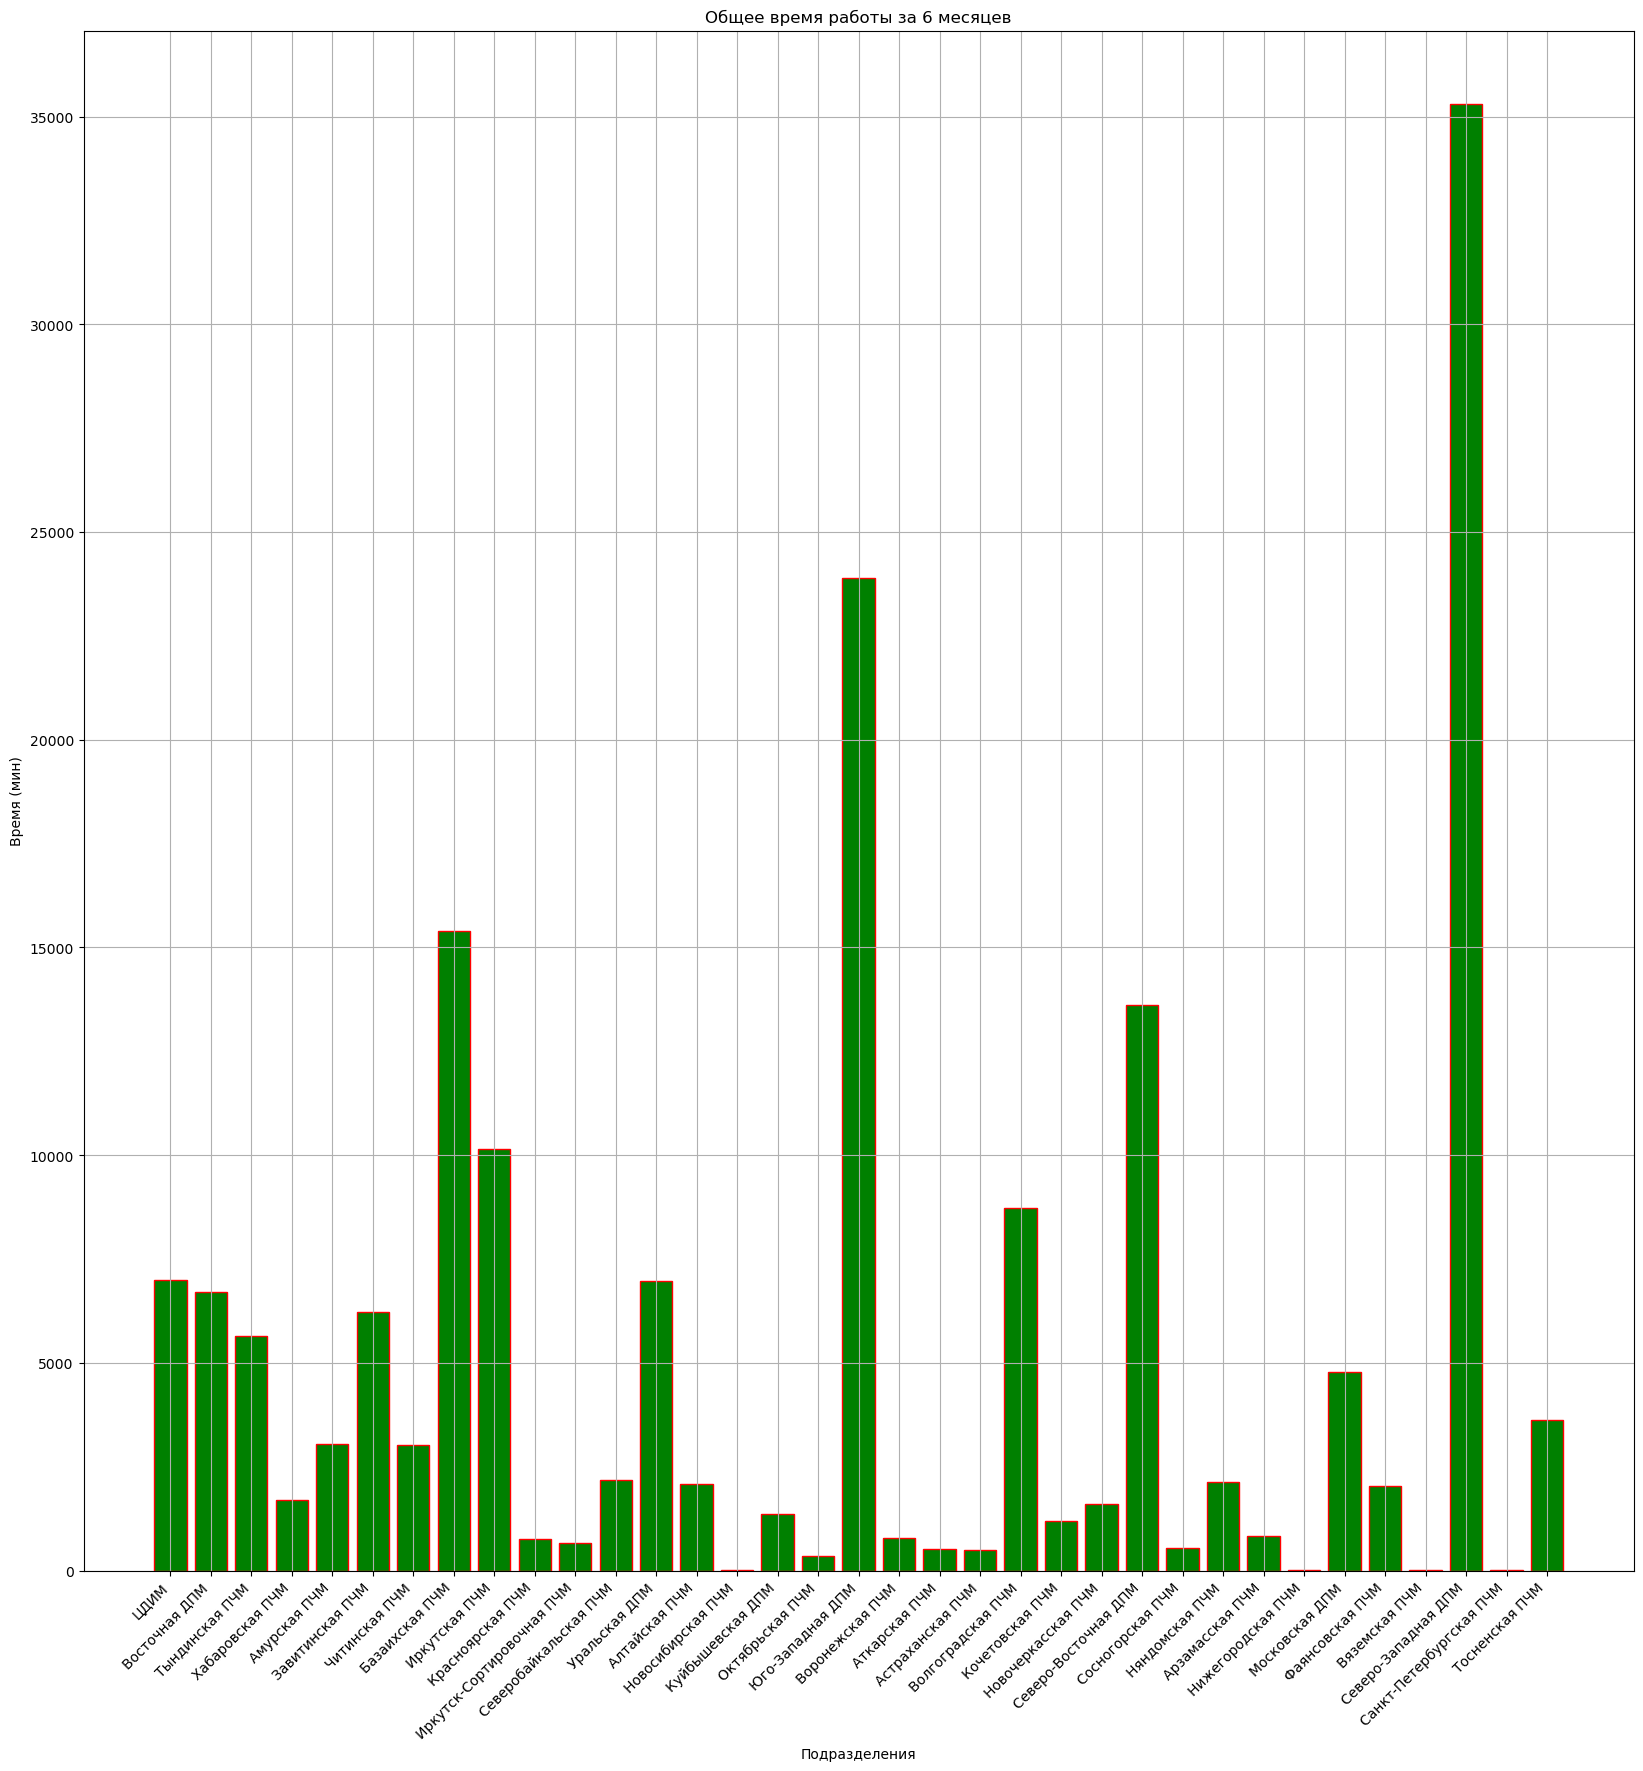

In [41]:
#Построим график
plt.figure(figsize=(20, 20))
plt.bar(tot_time_work['Структурное подразделение'],tot_time_work['tot_time_works'],color = 'g', edgecolor='r')
plt.xlabel('Подразделения')
plt.ylabel('Время (мин)')
plt.title('Общее время работы за 6 месяцев')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [42]:
#Выделим в отдельную таблицу общее кол-во подключений к системе
total_connections = df[['Структурное подразделение','tot_connections']]
total_connections = total_connections[total_connections['tot_connections']>0]

In [43]:
#Подключения
total_connections.sort_values(by = 'tot_connections',ascending = False)

,Структурное подразделение,tot_connections
26,Юго-Западная ДПМ,200
2,ЦДИМ,198
46,Северо-Западная ДПМ,103
34,Северо-Восточная ДПМ,101
14,Уральская ДПМ,100
3,Восточная ДПМ,87
41,Московская ДПМ,68
23,Куйбышевская ДПМ,64
7,Завитинская ПЧМ,58
8,Читинская ПЧМ,54


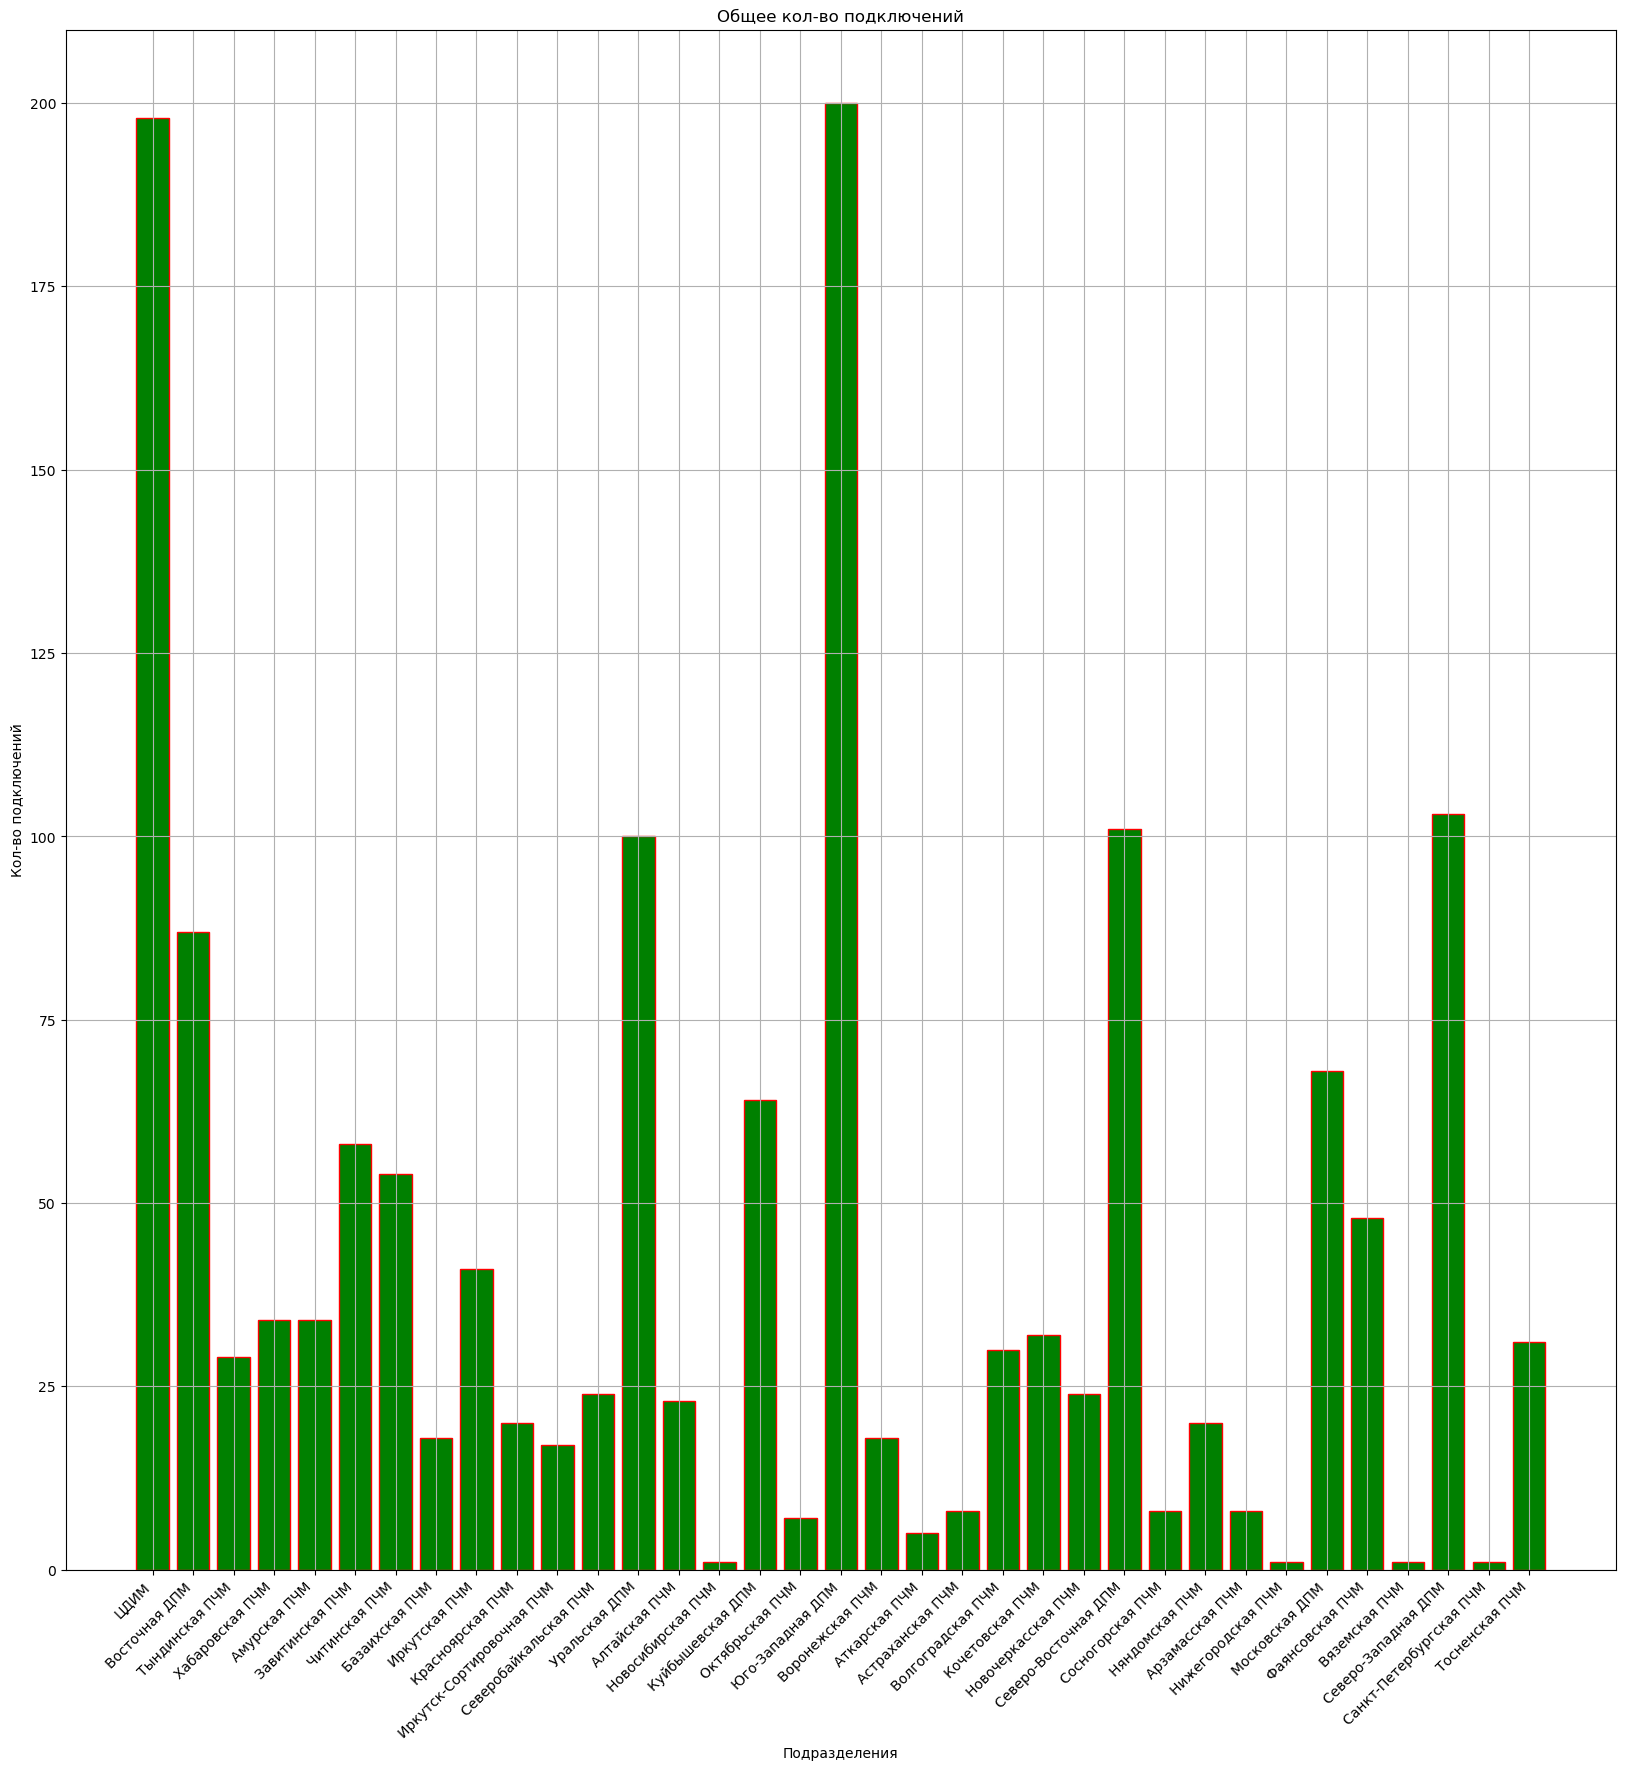

In [44]:
#Построим график 
plt.figure(figsize=(20, 20))
plt.bar(total_connections['Структурное подразделение'],total_connections['tot_connections'],color = 'g', edgecolor='r')
plt.xlabel('Подразделения')
plt.ylabel('Кол-во подключений')
plt.title('Общее кол-во подключений')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

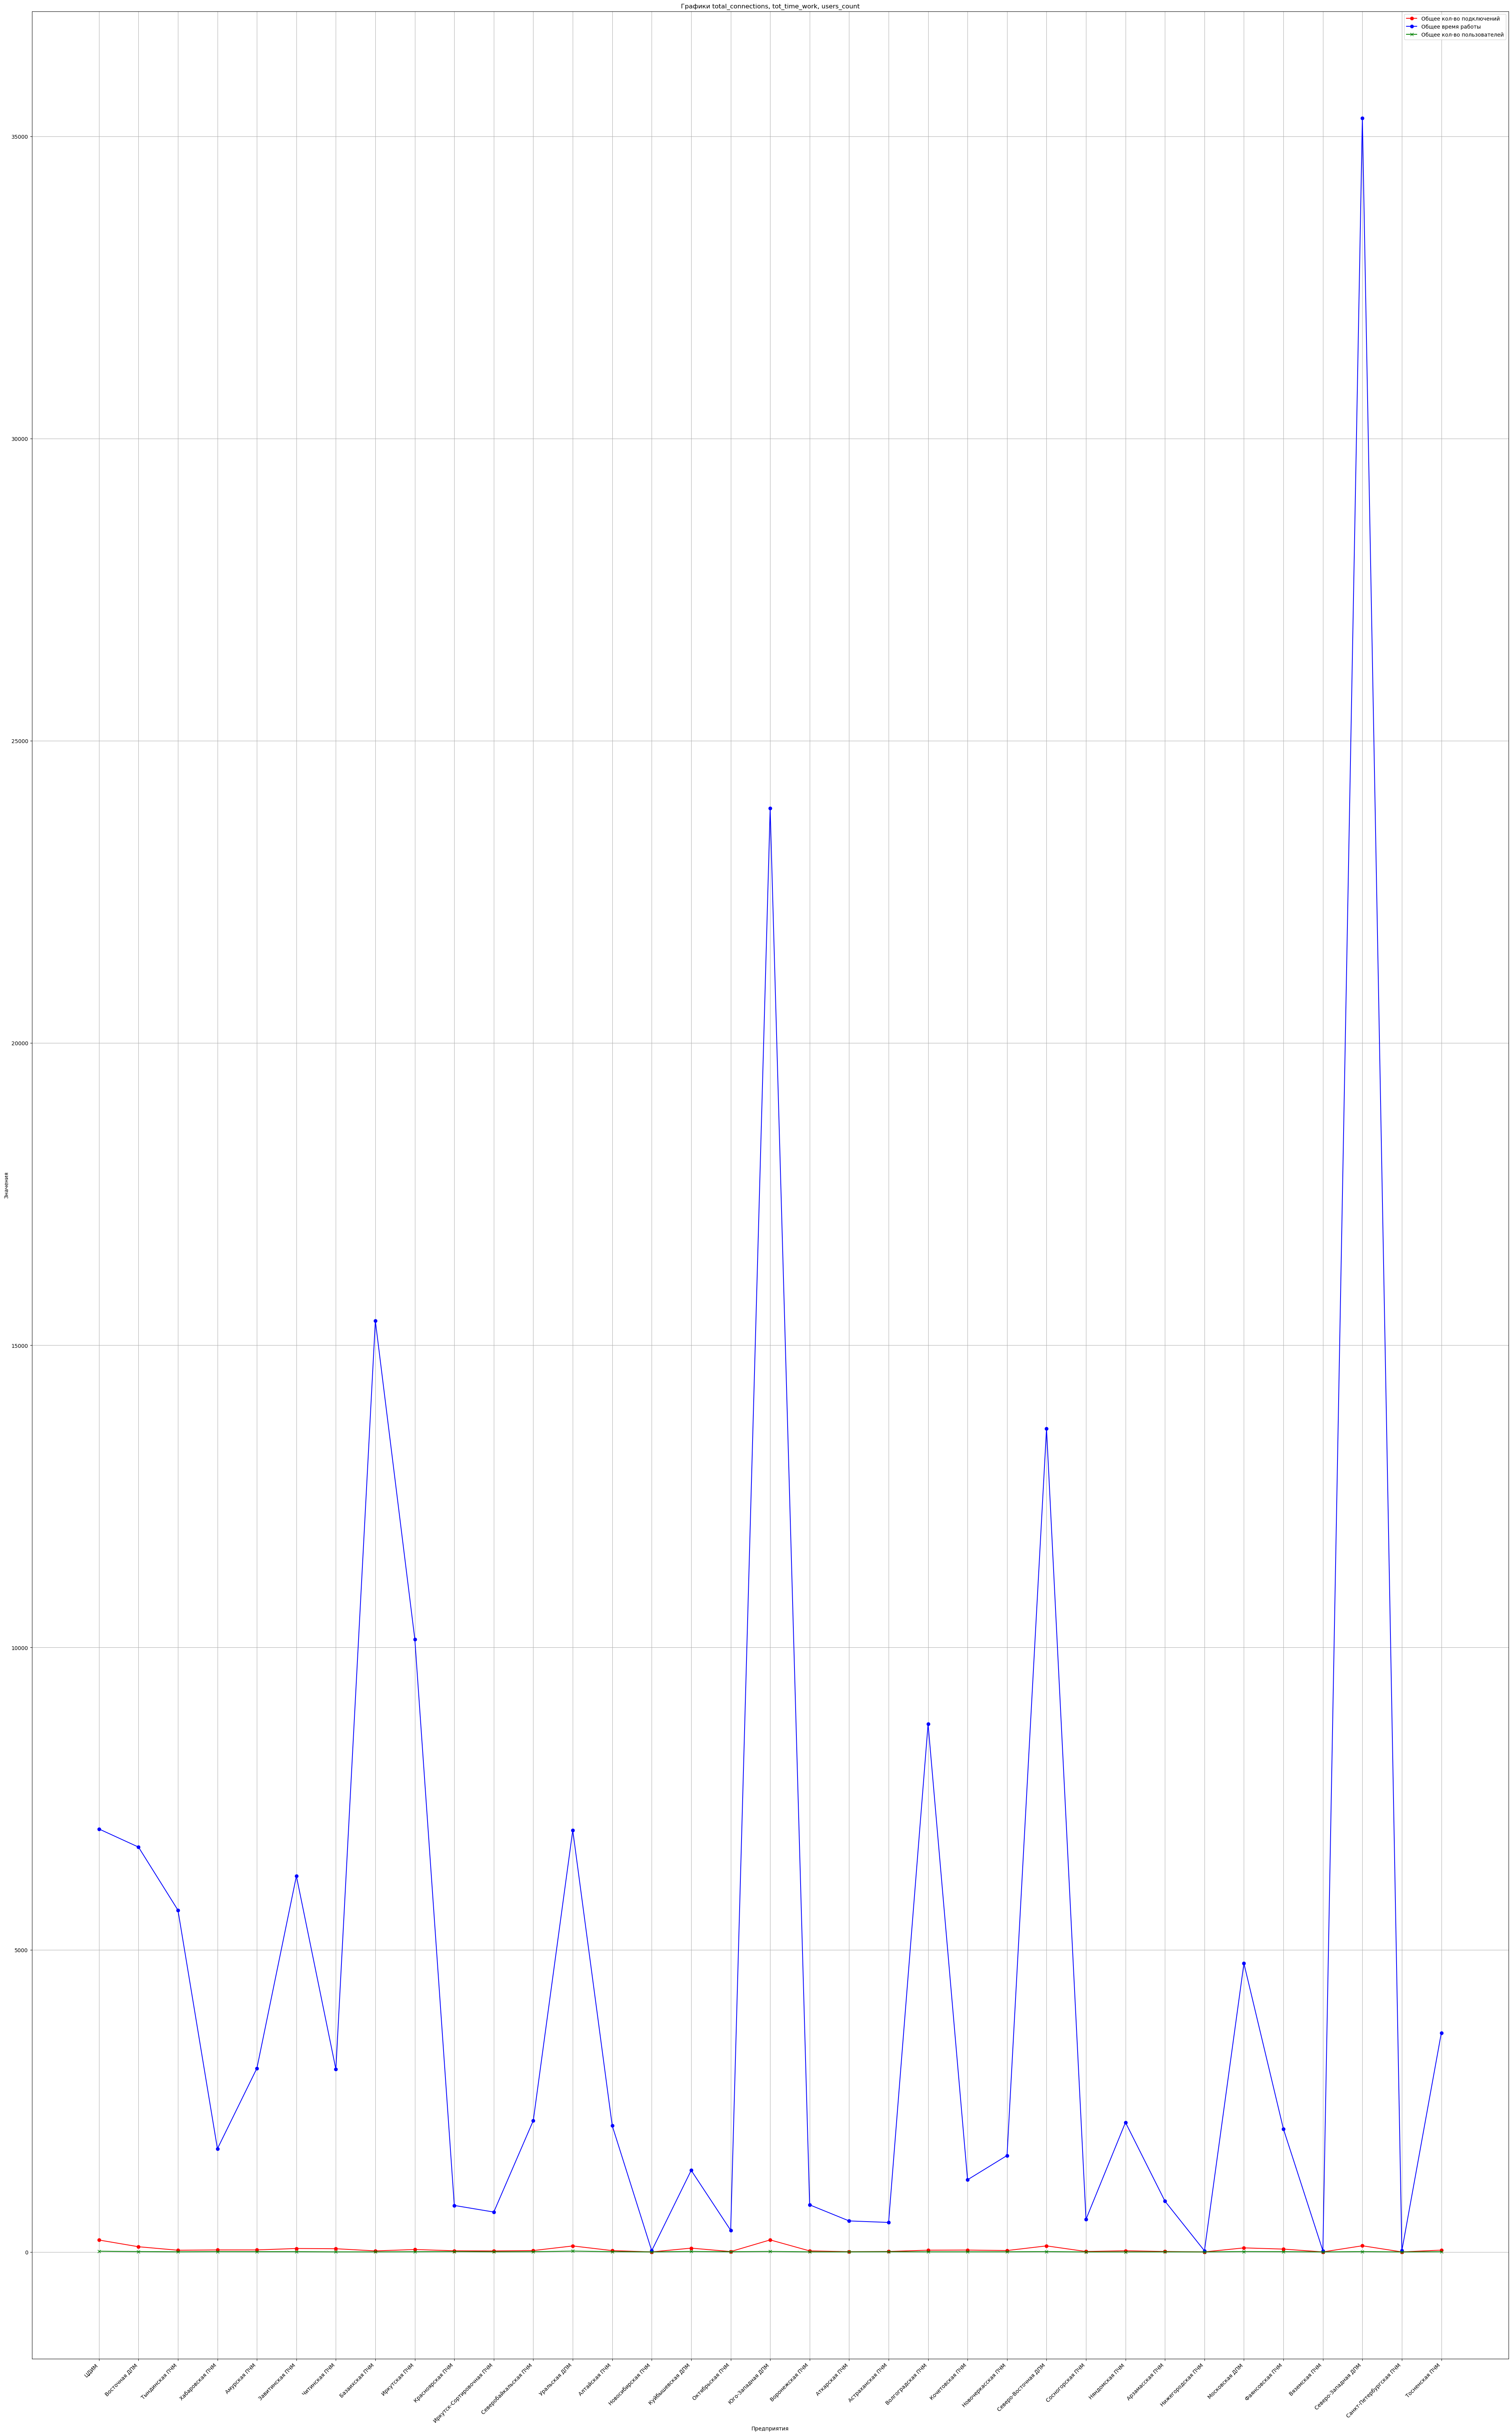

In [45]:
# А теперь для наглядности совместим их на одном графике для анализа и поиска зависимостей
plt.figure(figsize=(50, 80))
# График total_connections

plt.plot(total_connections['Структурное подразделение'], total_connections['tot_connections'], label='Общее кол-во подключений', marker='o', color = 'r')

# График tot_time_work
plt.plot(tot_time_work['Структурное подразделение'], tot_time_work['tot_time_works'], label='Общее время работы', marker='o',color = 'blue')

# График users_count
plt.plot(users_count['Структурное подразделение'], users_count['tot_users_work'],  label='Общее кол-во пользователей', marker='x', color = 'g')

# Добавление легенды
plt.legend()

# Добавление заголовка и подписей осей

plt.title('Графики total_connections, tot_time_work, users_count')
plt.xlabel('Предприятия')
plt.ylabel('Значения')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Странная картина вырисовывается на графике
У нас есть "выпирающие" данные по общему времени работы, при этом кол-во пользователей и подключений не такое и большое \
Это требует расчета среднего времени работы на 1 пользователя и за

In [46]:
#Добавим в таблицу total_connections среднее время работы
total_connections['mean_worktime_per_month'] = (tot_time_work['tot_time_works']/5)
total_connections.sort_values(by = 'mean_worktime_per_month',ascending =False)
total_connections

,Структурное подразделение,tot_connections,mean_worktime_per_month
2,ЦДИМ,198,1399.6
3,Восточная ДПМ,87,1339.8
4,Тындинская ПЧМ,29,1131.0
5,Хабаровская ПЧМ,34,341.6
6,Амурская ПЧМ,34,608.0
7,Завитинская ПЧМ,58,1243.8
8,Читинская ПЧМ,54,604.8
9,Базаихская ПЧМ,18,3080.6
10,Иркутская ПЧМ,41,2027.6
11,Красноярская ПЧМ,20,154.0


In [47]:
#Посчитаем кол-во коннектов в месяц и время работы на 1 коннект
total_connections['mean_connect_per_month'] = total_connections['tot_connections']/5
total_connections.sort_values(by = ['mean_worktime_per_month'],ascending =False)

,Структурное подразделение,tot_connections,mean_worktime_per_month,mean_connect_per_month
46,Северо-Западная ДПМ,103,7060.8,20.6
26,Юго-Западная ДПМ,200,4777.4,40.0
9,Базаихская ПЧМ,18,3080.6,3.6
34,Северо-Восточная ДПМ,101,2724.2,20.2
10,Иркутская ПЧМ,41,2027.6,8.2
30,Волгоградская ПЧМ,30,1747.0,6.0
2,ЦДИМ,198,1399.6,39.6
14,Уральская ДПМ,100,1395.2,20.0
3,Восточная ДПМ,87,1339.8,17.4
7,Завитинская ПЧМ,58,1243.8,11.6


In [48]:
total_connections

,Структурное подразделение,tot_connections,mean_worktime_per_month,mean_connect_per_month
2,ЦДИМ,198,1399.6,39.6
3,Восточная ДПМ,87,1339.8,17.4
4,Тындинская ПЧМ,29,1131.0,5.8
5,Хабаровская ПЧМ,34,341.6,6.8
6,Амурская ПЧМ,34,608.0,6.8
7,Завитинская ПЧМ,58,1243.8,11.6
8,Читинская ПЧМ,54,604.8,10.8
9,Базаихская ПЧМ,18,3080.6,3.6
10,Иркутская ПЧМ,41,2027.6,8.2
11,Красноярская ПЧМ,20,154.0,4.0


In [49]:
total_connections.describe()

,tot_connections,mean_worktime_per_month,mean_connect_per_month
count,35.000000,35.000000,35.000000
mean,43.314286,991.011429,8.662857
std,48.697609,1477.989334,9.739522
min,1.000000,4.000000,0.200000
25%,12.500000,143.100000,2.500000
50%,29.000000,417.800000,5.800000
75%,56.000000,1291.800000,11.200000
max,200.000000,7060.800000,40.000000


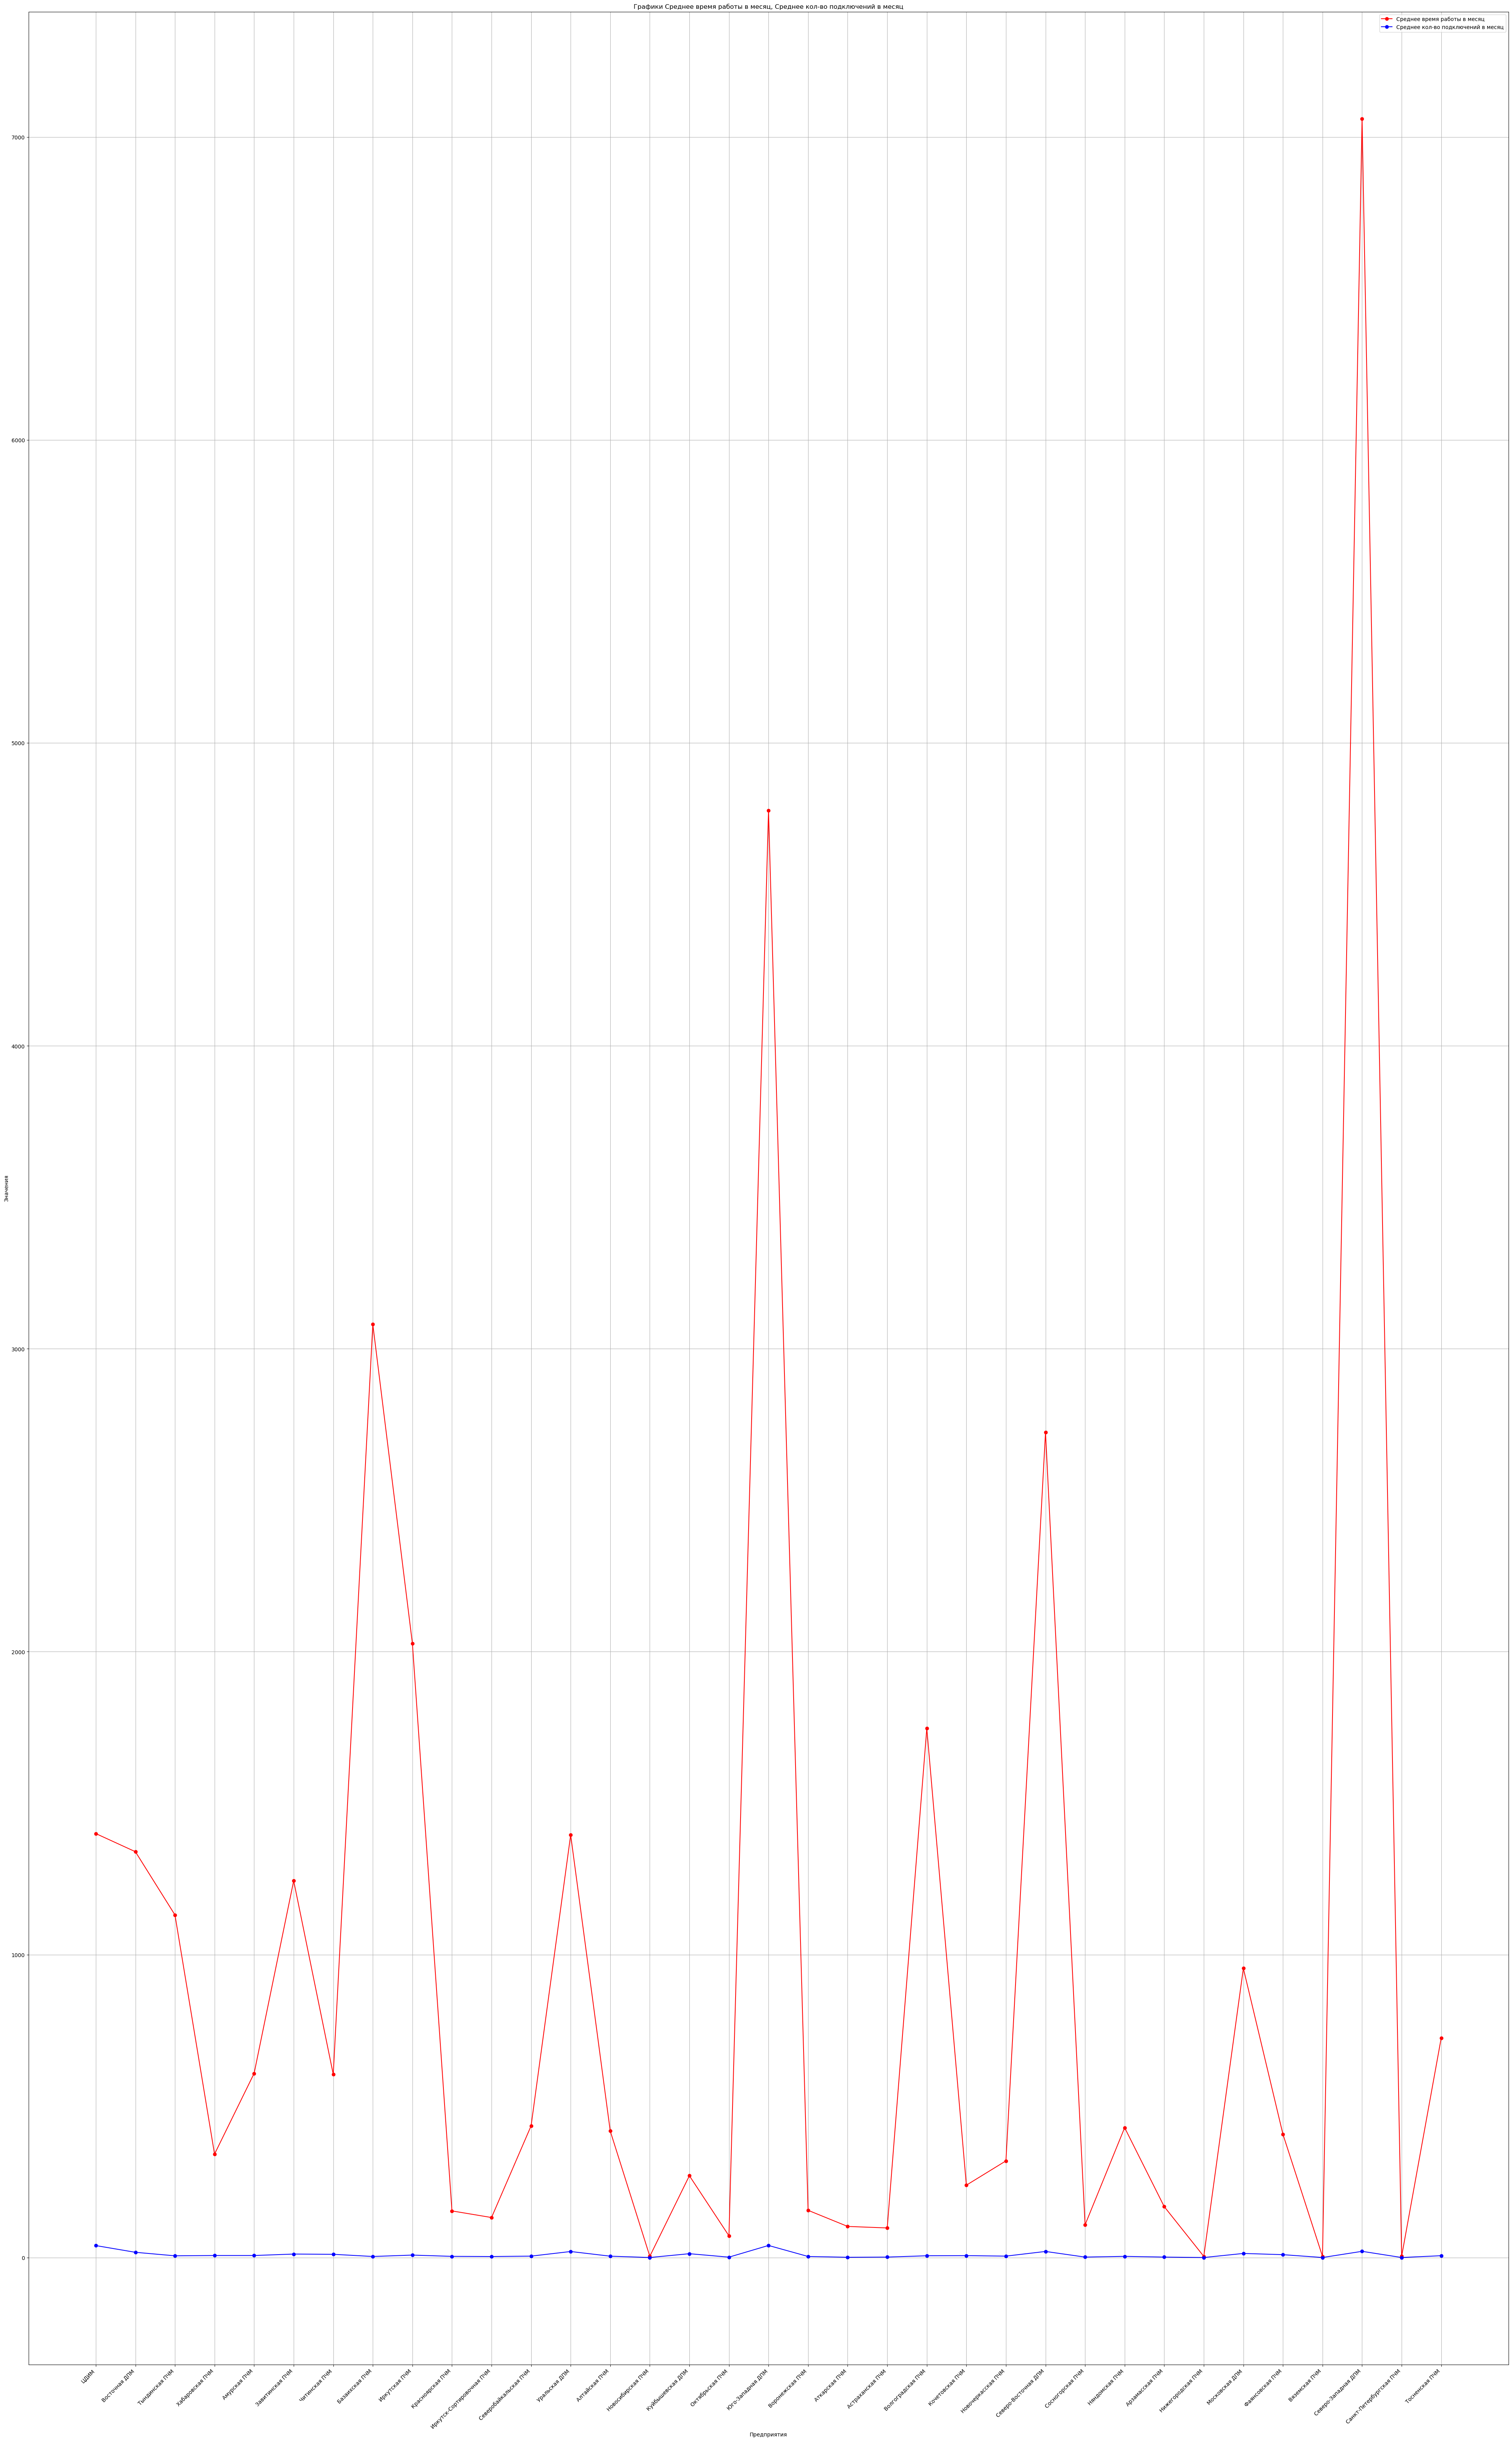

In [50]:
plt.figure(figsize=(50, 80))
# График total_connections

plt.plot(total_connections['Структурное подразделение'], total_connections['mean_worktime_per_month'], label='Среднее время работы в месяц', marker='o', color = 'r')
plt.plot(total_connections['Структурное подразделение'], total_connections['mean_connect_per_month'], label='Среднее кол-во подключений в месяц', marker='o', color = 'b')


# Добавление легенды
plt.legend()

# Добавление заголовка и подписей осей

plt.title('Графики Среднее время работы в месяц, Среднее кол-во подключений в месяц')
plt.xlabel('Предприятия')
plt.ylabel('Значения')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [51]:
#Добавим еще одни столбец со средним значением работы 1 пользователя в месяц
total_connections['mean_time_per_user'] = total_connections['mean_worktime_per_month']/total_connections['mean_connect_per_month']
total_connections.sort_values(by = 'mean_time_per_user', ascending = False).round(2)

,Структурное подразделение,tot_connections,mean_worktime_per_month,mean_connect_per_month,mean_time_per_user
9,Базаихская ПЧМ,18,3080.6,3.6,855.72
46,Северо-Западная ДПМ,103,7060.8,20.6,342.76
30,Волгоградская ПЧМ,30,1747.0,6.0,291.17
10,Иркутская ПЧМ,41,2027.6,8.2,247.27
4,Тындинская ПЧМ,29,1131.0,5.8,195.00
34,Северо-Восточная ДПМ,101,2724.2,20.2,134.86
26,Юго-Западная ДПМ,200,4777.4,40.0,119.43
49,Тосненская ПЧМ,31,724.8,6.2,116.90
7,Завитинская ПЧМ,58,1243.8,11.6,107.22
36,Няндомская ПЧМ,20,428.8,4.0,107.20


In [52]:
total_connections['mean_time_per_user(hour)'] = total_connections['mean_time_per_user']/60
total_connections.sort_values(by = 'mean_time_per_user(hour)', ascending = False).round(2)

,Структурное подразделение,tot_connections,mean_worktime_per_month,mean_connect_per_month,mean_time_per_user,mean_time_per_user(hour)
9,Базаихская ПЧМ,18,3080.6,3.6,855.72,14.26
46,Северо-Западная ДПМ,103,7060.8,20.6,342.76,5.71
30,Волгоградская ПЧМ,30,1747.0,6.0,291.17,4.85
10,Иркутская ПЧМ,41,2027.6,8.2,247.27,4.12
4,Тындинская ПЧМ,29,1131.0,5.8,195.00,3.25
34,Северо-Восточная ДПМ,101,2724.2,20.2,134.86,2.25
26,Юго-Западная ДПМ,200,4777.4,40.0,119.43,1.99
49,Тосненская ПЧМ,31,724.8,6.2,116.90,1.95
7,Завитинская ПЧМ,58,1243.8,11.6,107.22,1.79
36,Няндомская ПЧМ,20,428.8,4.0,107.20,1.79


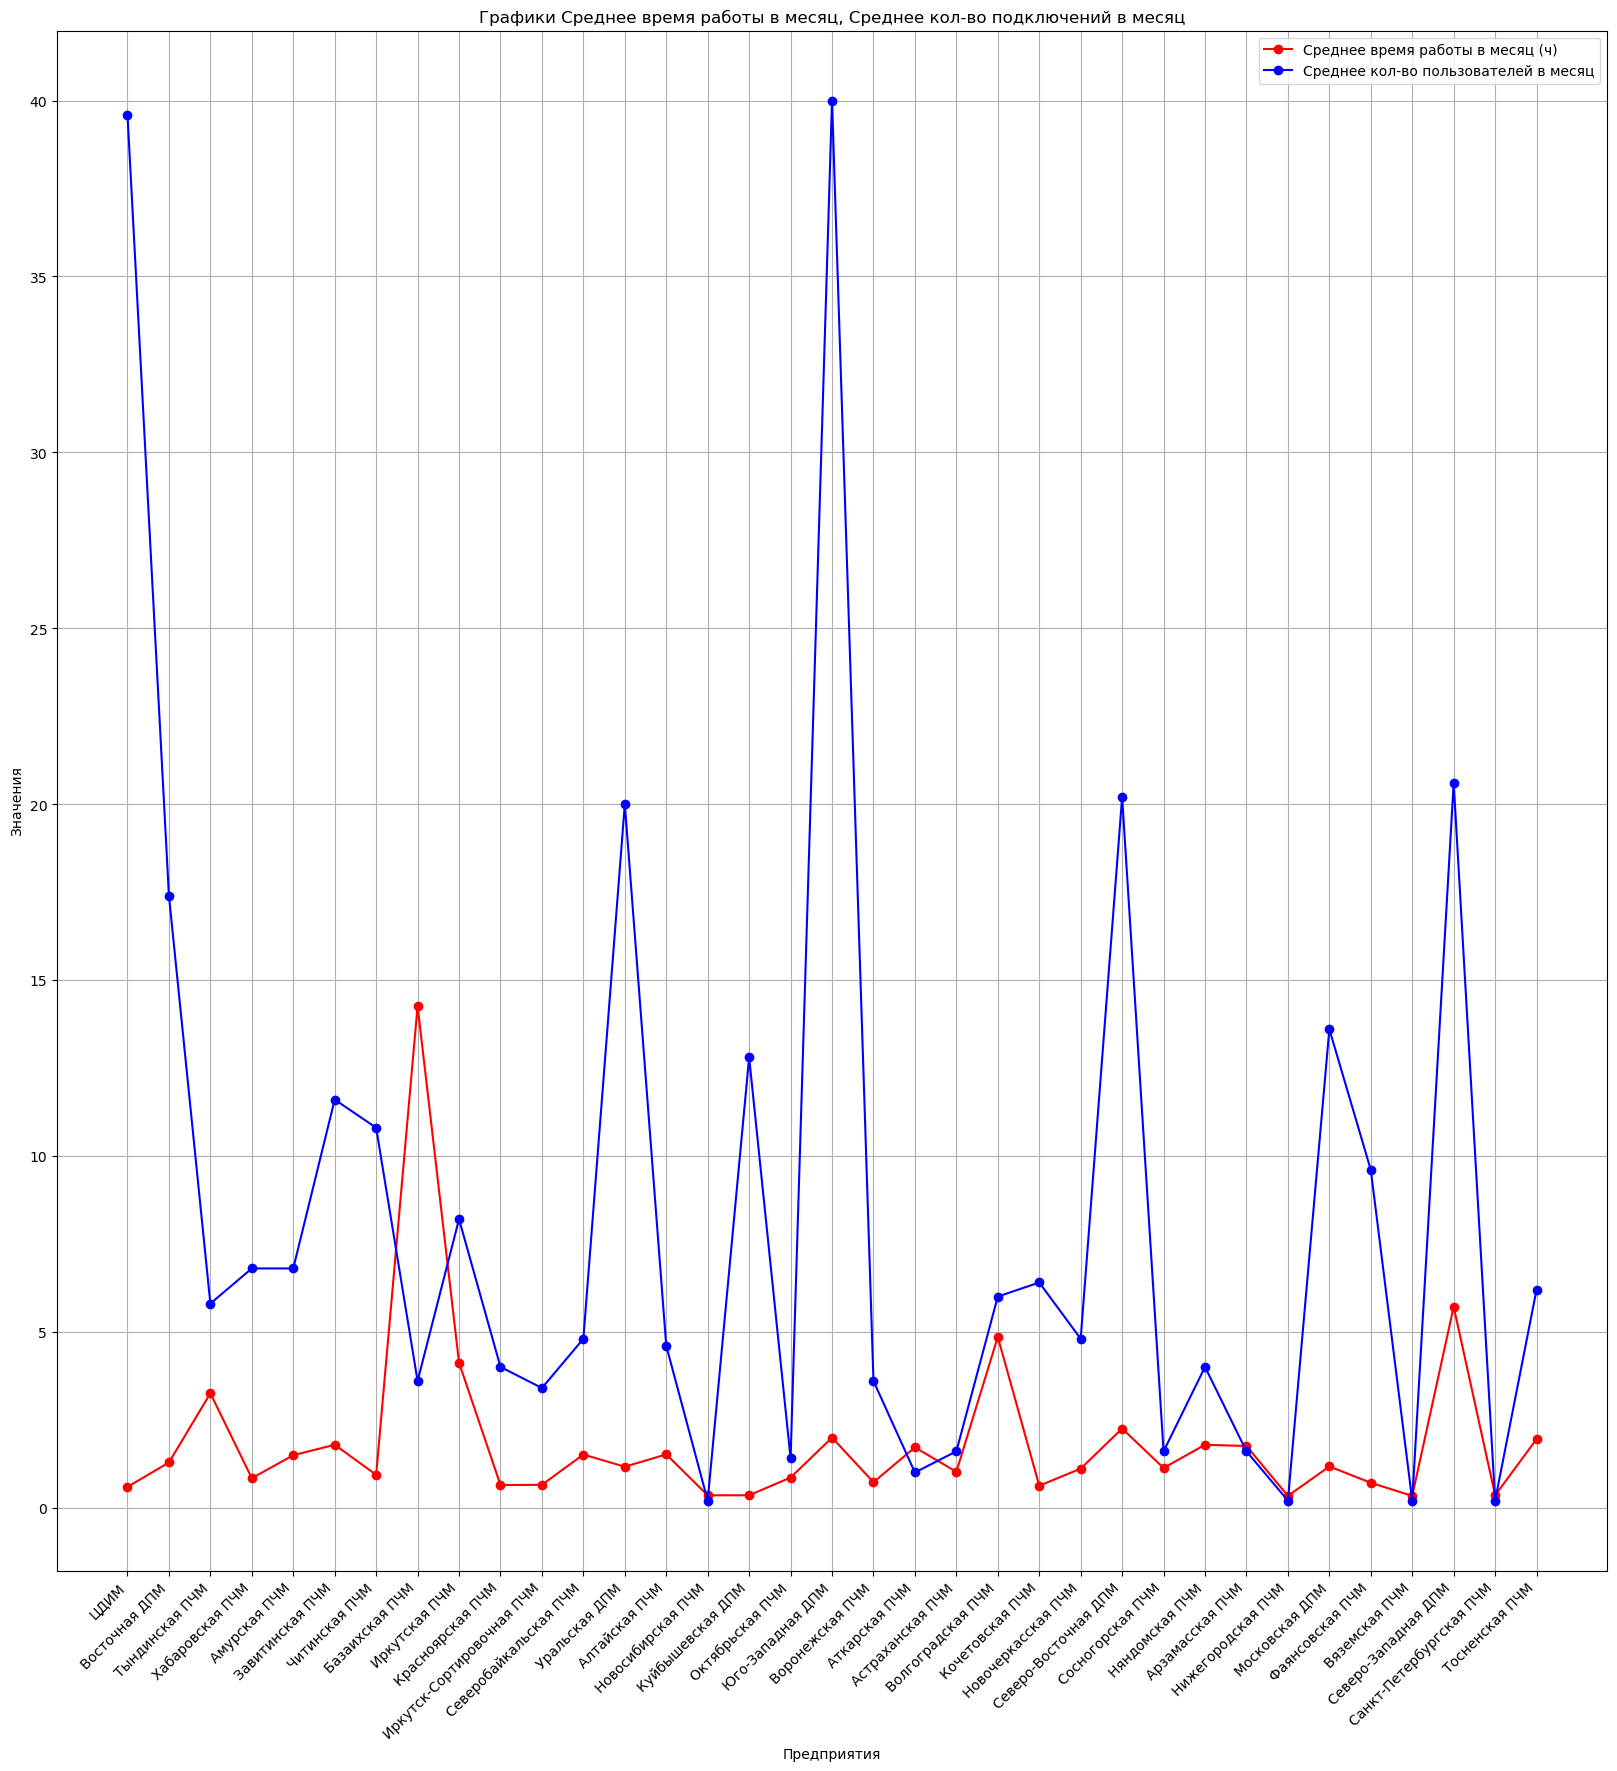

In [53]:
#Построим график по средним значениям пользователей и коннектам в месяц
plt.figure(figsize=(20, 20))
# График total_connections

plt.plot(total_connections['Структурное подразделение'], total_connections['mean_time_per_user(hour)'], label='Среднее время работы в месяц (ч)', marker='o', color = 'r')
plt.plot(total_connections['Структурное подразделение'], total_connections['mean_connect_per_month'], label='Среднее кол-во пользователей в месяц', marker='o', color = 'b')

# Добавление легенды
plt.legend()

# Добавление заголовка и подписей осей

plt.title('Графики Среднее время работы в месяц, Среднее кол-во подключений в месяц')
plt.xlabel('Предприятия')
plt.ylabel('Значения')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()



## Вывод

Данные с которыми работали хорошего качества, без дубликатов и с минимальным кол-вом пропусков \
**13 подразделений НЕ работали с января по май 2023** \
            Топкинская ПЧМ                0  
                Омская ПЧМ                0  
            Смолинская ПЧМ                0  
           Челябинская ПЧМ                0  
              Пермская ПЧМ                0  
      Екатеринбургская ПЧМ                0  
            Сызранская ПЧМ                0  
            Тихорецкая ПЧМ                0  
           Вологодская ПЧМ                0  
           Ярославская ПЧМ                0  
             Рязанская ПЧМ                0  
              Брянская ПЧМ                0  
           Нигозерская ПЧМ                0  
**6 дирекций работали в системе каждый месяц:** 
ЦДИМ
Красноярская ПЧМ
Уральская ДПМ
Алтайская ПЧМ
Куйбышевская ДПМ
Юго-Западная ДПМ  

**Лидеры по количеству подключений к системе:**   
Юго-Западная ДПМ - 200  
ЦДИМ - 198  
Северо-Западная ДПМ - 103  
Северо-Восточная ДПМ - 101  
Уральская ДПМ - 100  

**По пользователям:**
Уральская ДПМ - 15
ЦДИМ - 13
Куйбышевская ДПМ - 9  
По информации от ГВЦ в системе числится > 1000 пользователей, Однако, не смотря на выгрузку за период 1.01-31.05, можно выдвинуть гипотезу, что система почти не используется (гипотеза требует проверки, недостаточно данных)
Посчитаем конверсию за 5 месяцев  
**Конверсия за 5 месяцев 14.20%**

In [54]:
conversia = ((users_count['tot_users_work'].sum()/1113)*100).round(2)
display(f'Конверсия за 5 месяцев {conversia:.2f}%')

'Конверсия за 5 месяцев 14.20%'